In [1]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Shelley, Mrs. William (Imanita Parrish Hall)",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
# Finding how many null values are present in the dataset
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [4]:
# To see how many null values are present in each column
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling missing data:

## Working on Embarked:

In [5]:
train.loc[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
train.loc[~ train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
# Since the majority of the rows contain 'S'. We can safely assume the mode of the Embarked column ('S') to fill the nan values
train.Embarked = train.Embarked.fillna('S')
test.Embarked = test.Embarked.fillna('S')

## Working on age:

In [9]:
train.loc[train.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [10]:
train.loc[~ train.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
train.Age = train.Age.fillna(train.Age.mean()) # Since age is a numerical value we can fill it with mean of the age column
test.Age = test.Age.fillna(test.Age.mean()) 

In [12]:
train.Age.dtype # This should be int. Not a float, in order for the models to fit the data.

dtype('float64')

In [13]:
# Since the data should be discrete, we round the age to integers rather than float
train.Age = train.Age.apply(lambda age: int(age))
test.Age = test.Age.apply(lambda age: int(age))

## Working with Cabin:

In [14]:
train.loc[train.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,NaN,S


In [15]:
train.loc[~ train.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S


In [16]:

train['Cabin_name'] = train.Cabin.apply(lambda cabin: 'N' if pd.isna(cabin) else cabin[0])
train = train.drop('Cabin', axis=1)
test['Cabin_name'] = test.Cabin.apply(lambda cabin: 'N' if pd.isna(cabin) else cabin[0])
test = test.drop('Cabin', axis=1)


In [17]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,N
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,N
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S,N
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,C


In [18]:
train.Cabin_name.value_counts()  # Since the cabin names need to be in alphabetical order. 'T' doesnt make sense with the other data. Hence its erroneous.

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_name, dtype: int64

In [19]:
train.loc[train.Cabin_name.str.contains('T')]   # The output shows the person paid a Fare of 35.5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_name
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45,0,0,113784,35.5,S,T


In [20]:
train.loc[train.Fare == 35.5]    # Getting all the people who paid 35.5 as Fare, we can clearly see that the majority of people were in cabin 'A'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_name
23,24,1,1,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.5,S,A
55,56,1,1,"Woolner, Mr. Hugh",male,29,0,0,19947,35.5,S,C
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45,0,0,113784,35.5,S,T
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56,0,0,13213,35.5,C,A


In [21]:
# We can safely set the Cabin_name with 'A'
train.Cabin_name = train.Cabin_name.replace('T','A')

In [22]:
# Confirming that we replaced 'T' with 'A' or not, and yes we did replace 'T' with 'A'
train.Cabin_name.value_counts()

N    687
C     59
B     47
D     33
E     32
A     16
F     13
G      4
Name: Cabin_name, dtype: int64

In [23]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,N
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,N
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S,N
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,C


# Feature  Extraction:

In [24]:
# HOW THE FEATURES ARE CORRELATED WITH 'Survived'
train.corr()['Survived']

# Lets start with the last feature in the correlation series.

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.067809
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

## Working with Fare:

In [25]:
train.Fare.max()

512.3292

In [26]:
train.Fare.min()

0.0

In [27]:
train[['Survived','Fare']].groupby(['Fare']).sum()

,Survived
Fare,
0.0000,1
4.0125,0
5.0000,0
6.2375,0
6.4375,0
...,...
227.5250,3
247.5208,1
262.3750,2


In [28]:
def getFareCategory(fare):
    if 0<=fare<8:
        return '0-7'
    elif 8<=fare<16:
        return '8-15'
    elif 16<=fare<31:
        return '16-30'
    if 31<=fare<46:
        return '31-45'
    if 46<=fare<61:
        return '46-60'
    elif 61<=fare<121:
        return '61-120'
    elif 121<=fare<181:
        return '121-180'
    elif 181<=fare<240:
        return '181-240'
    elif fare>=240:
        return '240+'
    else:
        return 'None'

train['FareCat'] = train.Fare.apply(lambda fare: getFareCategory(fare))
test['FareCat'] = test.Fare.apply(lambda fare: getFareCategory(fare))



   FareCat  Survived
0  181-240         6
1     240+         8
2  121-180        14
3    31-45        20
4    46-60        29
5      0-7        52
6   61-120        54
7     8-15        75
8    16-30        84


Text(0, 0.5, 'Survived')

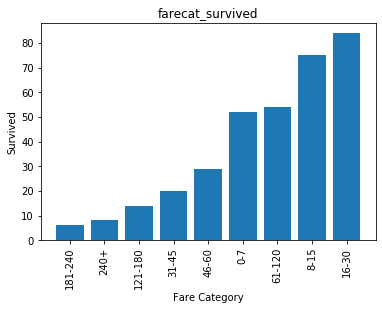

In [29]:
farecat_survived = train[['Survived','FareCat']].groupby(['FareCat']).sum().sort_values(by='Survived').reset_index()
print(farecat_survived)


import matplotlib.pyplot as plt

%matplotlib inline
plt.bar(farecat_survived.FareCat , farecat_survived.Survived)
plt.xticks(rotation=90);

plt.title('farecat_survived')
plt.xlabel('Fare Category')
plt.ylabel('Survived')

In [30]:
FareCat_total = train[['PassengerId','FareCat']].groupby(['FareCat']).count().reset_index()

FareCat_survived_percentage = pd.merge(farecat_survived,FareCat_total, on='FareCat')

FareCat_survived_percentage['Percentage'] = FareCat_survived_percentage.Survived/FareCat_survived_percentage.PassengerId*100
FareCat_survived_percentage = FareCat_survived_percentage.sort_values(by=['Percentage'])
FareCat_survived_percentage

,FareCat,Survived,PassengerId,Percentage
5,0-7,52,241,21.576763
7,8-15,75,243,30.864198
3,31-45,20,54,37.037037
8,16-30,84,182,46.153846
4,46-60,29,49,59.183673
6,61-120,54,84,64.285714
0,181-240,6,9,66.666667
1,240+,8,11,72.727273
2,121-180,14,18,77.777778


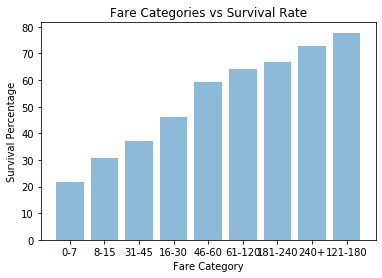

In [31]:
%matplotlib inline

plt.bar(FareCat_survived_percentage.FareCat, FareCat_survived_percentage.Percentage, align='center', alpha=0.5)
plt.xlabel('Fare Category')
plt.ylabel('Survival Percentage')
plt.title('Fare Categories vs Survival Rate');
# From the below visualization we can clearly see that the percentage of people who paid higher fare had likely chances of survival.

In [32]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_name,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,N,0-7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,61-120
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,N,0-7
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,C,46-60
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,N,8-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,N,8-15
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,B,16-30
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S,N,16-30
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,C,16-30


In [34]:
# One explanation to the above is, Since Fare and FareCat are highly correlated as shown in the output. Extracting a feature out of Fare (which was an important feature itself) , FareCat is an important feature as well.

### Working with Name:


In [35]:
train['Gender_title'] = train.Name.apply(lambda name: name.split(',')[1].split()[0])
test['Gender_title'] = test.Name.apply(lambda name: name.split(',')[1].split()[0])

In [36]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_name,FareCat,Gender_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,N,0-7,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,61-120,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,N,0-7,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,C,46-60,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,N,8-15,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,N,8-15,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,B,16-30,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S,N,16-30,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,C,16-30,Mr.


In [37]:
train.Gender_title.value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Mme.           1
Don.           1
Sir.           1
Capt.          1
Jonkheer.      1
the            1
Lady.          1
Ms.            1
Name: Gender_title, dtype: int64

In [38]:
# Since the count of all the other type of names is very less when compared to the other gender titles. It is clear that other names are not that common. So, I kept those gender_titles under category 5
title = {'Mr.':'Mr.', 'Mrs.':'Mrs.', 'Miss.':'Miss.', 'Master.':'Master.' }
train.Gender_title = train.Gender_title.map(title)
train.Gender_title = train.Gender_title.fillna('Other')
test.Gender_title = test.Gender_title.map(title)
test.Gender_title = test.Gender_title.fillna('Other')


In [39]:
train.Gender_title.value_counts()

Mr.        517
Miss.      182
Mrs.       125
Master.     40
Other       27
Name: Gender_title, dtype: int64

  Gender_title  Survived
0      Master.        23
1        Miss.       127
2          Mr.        81
3         Mrs.        99
4        Other        12


Text(0, 0.5, 'Survived')

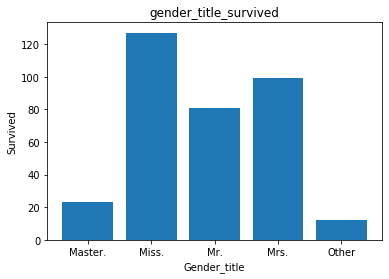

In [40]:
gender_title_survived = train[['Survived','Gender_title']].groupby(['Gender_title']).sum().reset_index()
print(gender_title_survived)

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.bar(gender_title_survived.Gender_title , gender_title_survived.Survived)
# plt.xticks(rotation=90);

plt.title('gender_title_survived')
plt.xlabel('Gender_title')
plt.ylabel('Survived')

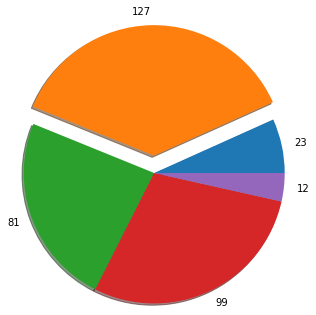

In [41]:
# From the above bar chart and below pie chart, it is clear that the various titles have various chances of survival.
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.pie(gender_title_survived.Survived, labels = gender_title_survived.Survived, 
        shadow=True, radius=1.5, explode=[0,0.2,0,0,0]);

In [42]:
t = train[['Survived','Gender_title']].copy()
t.Gender_title = t.Gender_title.map({'Mr.':1, 'Mrs.':2, 'Miss.':3, 'Master.':4, 'Other':0})
t.corr()   # This correlation is huge.

,Survived,Gender_title
Survived,1.000000,0.438386
Gender_title,0.438386,1.000000


## Working with Pclass:

   Pclass  Survived
0       1       136
1       2        87
2       3       119


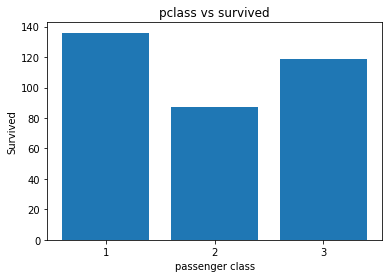

In [43]:
pclass_survived = train[['Pclass','Survived']].groupby(['Pclass']).sum().reset_index()
print(pclass_survived)

plt.bar(pclass_survived.Pclass, pclass_survived.Survived)

plt.title('pclass vs survived')
plt.xlabel('passenger class')
plt.ylabel('Survived')
plt.xticks(pclass_survived.Pclass);

   Pclass  Survived  Total  Percentage
0       1       136    216   62.962963
1       2        87    184   47.282609
2       3       119    491   24.236253


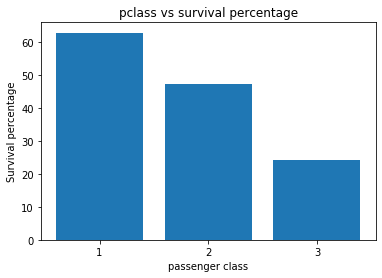

In [44]:
pclass_total = train[['Pclass','Survived']].groupby(['Pclass']).size().reset_index().rename(columns = {0:'Total'})

pclass_total_survived_percentage = pd.merge(pclass_survived,pclass_total, on='Pclass')

pclass_total_survived_percentage['Percentage'] = pclass_total_survived_percentage.Survived/pclass_total_survived_percentage.Total*100
print(pclass_total_survived_percentage)

plt.bar(pclass_total_survived_percentage.Pclass, pclass_total_survived_percentage.Percentage)

plt.title('pclass vs survival percentage')
plt.xlabel('passenger class')
plt.ylabel('Survival percentage')
plt.xticks(pclass_survived.Pclass);

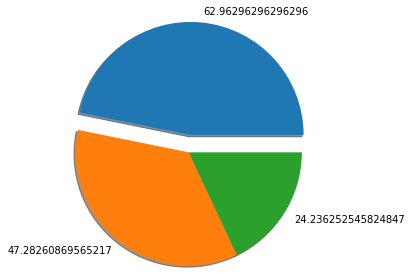

In [45]:
# From the above bar chart and below pie chart it is clear that the percentage  
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.pie(pclass_total_survived_percentage.Percentage, labels = pclass_total_survived_percentage.Percentage, 
        shadow=True, radius=1.3, explode=[0.2,0,0]);

In [46]:
train[['Pclass','Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


In [47]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_name,FareCat,Gender_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,N,0-7,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,61-120,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,N,0-7,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,C,46-60,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,N,8-15,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,N,8-15,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,B,16-30,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S,N,16-30,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,C,16-30,Mr.


### Working with Parch and SibSp and Age:

Text(0, 0.5, 'Age')

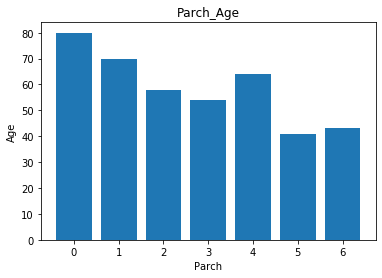

In [48]:
parch_age = train[['Parch','Age','Survived']].groupby(['Parch','Age']).sum().reset_index()

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.bar(parch_age.Parch , parch_age.Age)

plt.title('Parch_Age')
plt.xlabel('Parch')
plt.ylabel('Age')

## Creating Age categories:

In [49]:
def getAgeCategory(age):
    if (0<=age<20):
        return '1-20'
    elif (35>age>=20):
        return '20-35'
    elif (50>age>=35):
        return '35-50'
    elif (65>age>=50):
        return '50-65'
    elif (age>65):
        return '65+'
    else:
        return 'Undef'
    
train['Age_cat'] = train.Age.apply(lambda age: getAgeCategory(age))
test['Age_cat'] = test.Age.apply(lambda age: getAgeCategory(age))

In [50]:
surv_age = train[['Parch','Age_cat','Survived']].groupby(['Parch','Age_cat']).sum()  # One thing that can be added to this is, Percentages of the number of people who survived in each category based on Parch value.

surv_age

Survived
Parch Age_cat          
0     1-20           28
      20-35         137
      35-50          48
      50-65          19
      65+             1
      Undef           0
1     1-20           29
      20-35          16
      35-50          14
      50-65           6
      65+             0
      Undef           0
2     1-20           22
      20-35          14
      35-50           4
      50-65           0
3     1-20            0
      20-35           2
      35-50           0
      50-65           1
4     20-35           0
      35-50           0
      50-65           0
5     35-50           1
6     35-50           0

In [51]:
def get_has_no_parents_or_children_and_age_20_50(isTrain):
    if (isTrain == True):
        df = train[['Parch','Age']]
    else:
        df = test[['Parch','Age']]
    
    has_no_parents_or_children_and_age_20_50 = []

    for index,row in df.iterrows():

        if (row.Parch == 0 and (20<=row.Age<=50) ):
            has_no_parents_or_children_and_age_20_50.append(1)
        else:
            has_no_parents_or_children_and_age_20_50.append(0)
            
    return has_no_parents_or_children_and_age_20_50
        
train['has_no_parents_or_children_and_age_20_50'] = get_has_no_parents_or_children_and_age_20_50(True)
test['has_no_parents_or_children_and_age_20_50'] = get_has_no_parents_or_children_and_age_20_50(False)
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_name,FareCat,Gender_title,Age_cat,has_no_parents_or_children_and_age_20_50
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,N,0-7,Mr.,20-35,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,61-120,Mrs.,35-50,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,N,0-7,Miss.,20-35,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,C,46-60,Mrs.,35-50,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,N,8-15,Mr.,35-50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,N,8-15,Other,20-35,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,B,16-30,Miss.,1-20,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S,N,16-30,Miss.,20-35,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,C,16-30,Mr.,20-35,1


In [52]:
train[['has_no_parents_or_children_and_age_20_50','Survived']].corr()  # 11.9% correlation

,has_no_parents_or_children_and_age_20_50,Survived
has_no_parents_or_children_and_age_20_50,1.000000,-0.119187
Survived,-0.119187,1.000000


   Parch  Survived
0      0       233
1      1        65
2      2        40
3      3         3
4      4         0
5      5         1
6      6         0


Text(0, 0.5, 'Age')

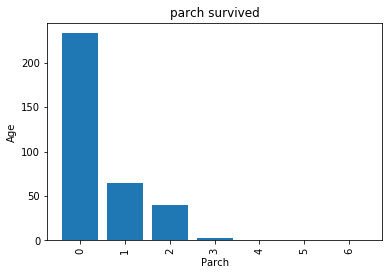

In [53]:
parch_sur = train[['Parch','Survived']].groupby(['Parch']).sum().reset_index()
print(parch_sur)

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.bar(parch_sur.Parch , parch_sur.Survived)
plt.xticks(rotation=90);
plt.title('parch survived')
plt.xlabel('Parch')
plt.ylabel('Age')

In [54]:
train['has_parents_or_children'] = train.Parch.apply(lambda parch: 0 if parch==0 else 1)
test['has_parents_or_children'] = test.Parch.apply(lambda parch: 0 if parch==0 else 1)

In [55]:
corr_1 = train[['has_parents_or_children','Survived']].corr()   # 14.7% correlation is useful.
corr_1


,has_parents_or_children,Survived
has_parents_or_children,1.000000,0.147408
Survived,0.147408,1.000000


## Dealing with Categorical Features:


### 1. Sex:

In [56]:
train.Sex = train.Sex.map({'male':0,'female':1})
test.Sex = test.Sex.map({'male':0,'female':1})

### 2. Embarked: 

In [57]:
train.Embarked = train.Embarked.map({'C':0,'S':1,'Q':2})
test.Embarked = test.Embarked.map({'C':0,'S':1,'Q':2})

### 3. Cabin name:

In [58]:
cabins = {'A':0,
          'B':1,
          'C':2,
          'D':3,
          'E':4,
          'F':5,
          'G':6,
          'T':0,
          'N':7   # N means None
         }

train.Cabin_name = train.Cabin_name.map(cabins)
test.Cabin_name = test.Cabin_name.map(cabins)


### 4. Age Cat:

In [59]:
age_cat = {'1-20':1, '20-35':2, '35-50':3,'50-65':4,'65+':5,'Undef':0}

train.Age_cat = train.Age_cat.map(age_cat)
train.Age_cat = train.Age_cat.apply(lambda age: int(age))
test.Age_cat = test.Age_cat.map(age_cat)
test.Age_cat = test.Age_cat.apply(lambda age: int(age))
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_name,FareCat,Gender_title,Age_cat,has_no_parents_or_children_and_age_20_50,has_parents_or_children
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,1,7,0-7,Mr.,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,0,2,61-120,Mrs.,3,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,1,7,0-7,Miss.,2,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,1,2,46-60,Mrs.,3,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,1,7,8-15,Mr.,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,1,7,8-15,Other,2,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,1,1,16-30,Miss.,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29,1,2,W./C. 6607,23.4500,1,7,16-30,Miss.,2,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,0,2,16-30,Mr.,2,1,0


## 5. Fare Cat:

In [60]:
FareCat = {'0-7':0, '121-180':6, '16-30':2, '181-240':7, '240+':8, '31-45':3, '46-60':4,
       '61-120':5, '8-15':1, 'None':9}
train.FareCat = train.FareCat.map(FareCat)
test.FareCat = test.FareCat.map(FareCat)


## 6. Gender_title:

In [61]:
title = {'Mr.':1, 'Mrs.':2, 'Miss.':3, 'Master.':4, 'Other':0}
train.Gender_title = train.Gender_title.map(title)
test.Gender_title = test.Gender_title.map(title)


# Converting Fare to int: (Rather than float)

In [62]:
train.Fare = train.Fare.fillna(0)
train.Fare = train.Fare.apply(lambda fare: int(fare))
test.Fare = test.Fare.fillna(0)
test.Fare = test.Fare.apply(lambda fare: int(fare))
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_name,FareCat,Gender_title,Age_cat,has_no_parents_or_children_and_age_20_50,has_parents_or_children
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,1,7,0,1,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,0,2,5,2,3,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,1,7,0,3,2,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,1,2,4,2,3,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,1,7,1,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13,1,7,1,0,2,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30,1,1,2,3,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29,1,2,W./C. 6607,23,1,7,2,3,2,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30,0,2,2,1,2,1,0


# STANDARDIZATION:

## 1. Age:

In [63]:
train.Age -= train.Age.mean()
train.Age /= train.Age.std()

test.Age -= test.Age.mean()
test.Age /= test.Age.std()


## 2. Fare:

In [64]:
train.Fare -= train.Fare.mean()
train.Fare /= train.Fare.std()

test.Fare -= test.Fare.mean()
test.Fare /= test.Fare.std()


## Saving pre-processed data to a csv:

In [65]:
train.to_csv("preprocessed_train_data.csv", index=False)

test.to_csv("preprocessed_test_data.csv", index=False)

In [66]:
pd.read_csv("preprocessed_train_data.csv")  # Just making sure everything was saved correctly

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_name,FareCat,Gender_title,Age_cat,has_no_parents_or_children_and_age_20_50,has_parents_or_children
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.579719,1,0,A/5 21171,-0.498667,1,7,0,1,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.649747,1,0,PC 17599,0.788962,0,2,5,2,3,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.272352,0,0,STON/O2. 3101282,-0.498667,1,7,0,3,2,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.419222,1,0,113803,0.426816,1,2,4,2,3,1,0
4,5,0,3,"Allen, Mr. William Henry",0,0.419222,0,0,373450,-0.478548,1,7,1,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,-0.195511,0,0,211536,-0.377952,1,7,1,0,2,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,-0.810244,0,0,112053,-0.035926,1,1,2,3,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,-0.041827,1,2,W./C. 6607,-0.176760,1,7,2,3,2,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,-0.272352,0,0,111369,-0.035926,0,2,2,1,2,1,0


In [67]:
pd.read_csv("preprocessed_test_data.csv")  # Just making sure everything was saved correctly

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_name,FareCat,Gender_title,Age_cat,has_no_parents_or_children_and_age_20_50,has_parents_or_children
0,892,3,"Kelly, Mr. James",0,0.300978,0,0,330911,-0.502937,2,7,0,1,2,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,1.328313,1,0,363272,-0.502937,1,7,0,2,3,1,0
2,894,2,"Myles, Mr. Thomas Francis",0,2.513699,0,0,240276,-0.467141,2,7,1,1,4,0,0
3,895,3,"Wirz, Mr. Albert",0,-0.252202,0,0,315154,-0.485039,1,7,1,1,2,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,-0.647330,1,1,3101298,-0.413448,1,7,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,-0.015125,0,0,A.5. 3236,-0.485039,1,7,1,1,2,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,0.696107,0,0,PC 17758,1.304742,0,2,5,0,3,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,0.617081,0,0,SOTON/O.Q. 3101262,-0.502937,1,7,0,1,3,1,0
416,1308,3,"Ware, Mr. Frederick",0,-0.015125,0,0,359309,-0.485039,1,7,1,1,2,1,0
